In [6]:
import numpy as np
import time 
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import SmoothBivariateSpline as SBS 
from scipy.interpolate import griddata
from scipy.integrate import quad,trapz
from scipy import stats
from scipy.stats import norm,geom
from scipy.cluster import vq
from scipy.spatial.distance import pdist,squareform
from scipy.linalg import eigh
import scipy.sparse
from scipy.sparse.linalg import eigsh
import scipy.cluster.hierarchy as hy
from matplotlib import pyplot as plt

0.9823005207649823
2.01081993983821
[ 2.01081994  2.11004221  2.20926449  2.30848676  2.40770904  2.50693131
  2.60615359  2.70537586  2.80459814  2.90382041  3.00304269  3.10226496
  3.20148724  3.30070951  3.39993179  3.49915406  3.59837634  3.69759861
  3.79682089  3.89604316  3.99526544  4.09448771  4.19370999  4.29293226
  4.39215454  4.49137681  4.59059909  4.68982136  4.78904363  4.88826591
  4.98748818  5.08671046  5.18593273  5.28515501  5.38437728  5.48359956
  5.58282183  5.68204411  5.78126638  5.88048866  5.97971093  6.07893321
  6.17815548  6.27737776  6.37660003  6.47582231  6.57504458  6.67426686
  6.77348913  6.87271141  6.97193368  7.07115596  7.17037823  7.26960051
  7.36882278  7.46804506  7.56726733  7.6664896   7.76571188  7.86493415
  7.96415643  8.0633787   8.16260098  8.26182325  8.36104553  8.4602678
  8.55949008  8.65871235  8.75793463  8.8571569   8.95637918  9.05560145
  9.15482373  9.254046    9.35326828  9.45249055  9.55171283  9.6509351
  9.75015738  9.8

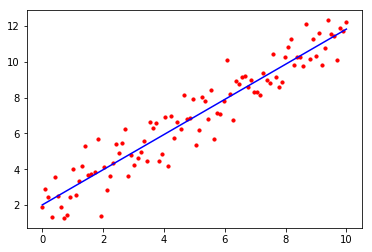

In [18]:
#1.最优化
#(1)数据建模和拟合
#线性回归
def func(x, a, b):
    return a*x+b
x = np.linspace(0, 10, 100)
y = func(x, 1, 2)
#np.random.normal默认是均值为0，标准差为1服从正态分布的数
yn = y+0.9*np.random.normal(size=len(x))
#按照直线方程拟合噪声数据(求得权值w和偏置值b)
a,b = curve_fit(func,x, yn)[0]
print(a)
print(b)
y1 = a*x+b
print(y1)
#可视化
plt.figure()
plt.scatter(x, yn, 10, "red")
plt.plot(x, y1,"blue")
plt.show()

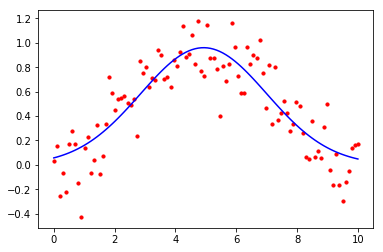

In [20]:
#高斯分布
#创建函数
def func(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))
x = np.linspace(0,10,100)
y = func(x, 1, 5, 2)
yn = y + 0.2*np.random.normal(size=len(x))
a, b, c = curve_fit(func, x, yn)[0]

y1 = a*np.exp(-(x-b)**2/(2*c**2))
#可视化
plt.figure()
plt.scatter(x, yn, 10, "red")
plt.plot(x, y1,"blue")
plt.show()

[-3.]
[13.40773078 18.11366128 31.78330863 37.0799992  39.84837786 43.8258775 ]
[-0.36592269 -0.31886339 -0.18216691 -0.12920001 -0.10151622 -0.06174122]


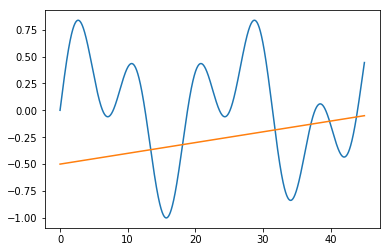

In [44]:
#(2)函数求解
#X = fsolve(FUN,X0,OPTIONS),X0是初值
#fsolve()解决的方程形式为F(X)=0;
#lambda是隐函数
line = lambda x: x+3
solution = fsolve(line,-2)
print(solution)
#求函数交叉点
def findIntersection(func1,func2,x0):
    return fsolve(lambda x: func1(x)-func2(x), x0)
funky = lambda x: np.cos(x/5)*np.sin(x/2)
line = lambda x: 0.01*x-0.5
x = np.linspace(0,45,10000)
result = findIntersection(funky,line,[15,20,30,35,40,45])
print(result)
print(line(result))
plt.plot(x,funky(x),x,line(x))
plt.show()

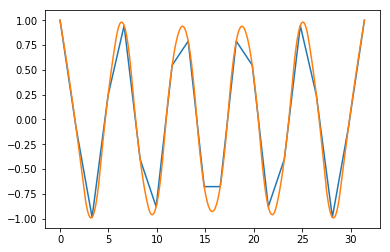

In [72]:
#2.插值
#(1)interp1d 
x = np.linspace(0, 10*np.pi, 20)
y = np.cos(x)
#分别用linear(线性)和quadratic(非线性)插值
fl = interp1d(x,y,kind='linear')
fq = interp1d(x,y,kind='quadratic')
xint = np.linspace(x.min(), x.max(), 1000)
yintl = fl(xint)
yintq = fq(xint)
plt.figure()
plt.plot(x,y)
#plt.plot(xint, yintl)
plt.plot(xint,yintq)
plt.show()

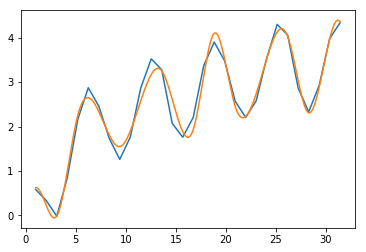

In [73]:
#(2)UnivariateSpline
sample = 30
x = np.linspace(1,10*np.pi,sample)
y = np.cos(x)+np.log(x)+np.random.randn(sample)/10
#插值,参数s为smoothing factor
f = UnivariateSpline(x,y,s=1)
xint = np.linspace(x.min(), x.max(), 1000)
yint = f(xint)
plt.figure()
plt.plot(x,y)
plt.plot(xint,yint)
plt.show()

In [78]:
#(3)griddata 
ripple = lambda x,y: np.sqrt(x**2+y**2)+np.sin(x**2+y**2)
#生成grid数据
grid_x,grid_y = np.mgrid[0:5:1000j,0:5:1000j]
xy = np.random.rand(1000,2)
sample = ripple(xy[:,0]*5,xy[:,1]*5)
#使用cubic方法插值
grid_z0 = griddata(xy*5,sample,(grid_x,grid_y),method='cubic')

In [6]:
#(4)SmoothBivariateSpline
ripple = lambda x, y: np.sqrt(x**2 + y**2)+np.sin(x**2 + y**2) 
# 生成待插值样本 
xy= np.random.rand(1000, 2) 
x, y = xy[:,0], xy[:,1] 
sample = ripple(xy[:,0] * 5 , xy[:,1] * 5) 
# 插值 
fit = SBS(x * 5, y * 5, sample, s=0.01, kx=4, ky=4) 
interp = fit(np.linspace(0, 5, 1000), np.linspace(0, 5, 1000)) 

In [23]:
#3.积分
#(1)解析积分
func = lambda x: np.cos(np.exp(x)) ** 2 
solution = quad(func,0,3)
print("积分值为%lf，误差为%lf"%(solution[0],solution[1]))

积分值为1.296468，误差为0.000000


In [31]:
#(2)数值积分
#将数值限制在0和5之间
x = np.sort(np.random.randn(150) * 4 + 4).clip(0,5)
func = lambda x: np.sin(x) * np.cos(x ** 2) + 1 
y = func(x) 
fsolution = quad(func,0,5)
dsolution = trapz(y,x=x)
print("fsolution=",fsolution[0])
print("dsolution=",dsolution)
print("The difference is ",np.abs(fsolution[0]-dsolution))

fsolution= 5.100345067540932
dsolution= 4.982608148878347
The difference is  0.11773691866258496


In [35]:
#4.统计
#randn是标准正太分布的函数，默认均值为0，方差为1
x = np.random.randn(1000) 
mean = x.mean()
std = x.std()
var = x.var()
print(mean,std,var)

-0.0011069564557008543 1.0023507575339792 1.0047070411289418


In [49]:
#scipy.stats例子
#norm
x = np.linspace(-5,5,1000)
#设置正态分布参数，loc为均值，scale为标准差
dist = norm(loc=0,scale=1)
#概率密度函数PDF
pdf = dist.pdf(x)
#分布函数CDF
cdf = dist.cdf(x)
sample = dist.rvs(500)
print("概率密度函数PDF: \n", pdf)
print("分布函数CDF: \n", cdf)
print("所生成的样本点: \n", sample)

概率密度函数PDF: 
 [1.48671951e-06 1.56294518e-06 1.64291438e-06 1.72680223e-06
 1.81479157e-06 1.90707332e-06 2.00384677e-06 2.10531999e-06
 2.21171010e-06 2.32324372e-06 2.44015731e-06 2.56269761e-06
 2.69112199e-06 2.82569895e-06 2.96670852e-06 3.11444274e-06
 3.26920615e-06 3.43131624e-06 3.60110404e-06 3.77891458e-06
 3.96510749e-06 4.16005756e-06 4.36415530e-06 4.57780761e-06
 4.80143840e-06 5.03548920e-06 5.28041992e-06 5.53670947e-06
 5.80485658e-06 6.08538047e-06 6.37882168e-06 6.68574289e-06
 7.00672970e-06 7.34239154e-06 7.69336257e-06 8.06030255e-06
 8.44389784e-06 8.84486240e-06 9.26393876e-06 9.70189908e-06
 1.01595463e-05 1.06377152e-05 1.11372736e-05 1.16591234e-05
 1.22042022e-05 1.27734842e-05 1.33679815e-05 1.39887459e-05
 1.46368699e-05 1.53134881e-05 1.60197791e-05 1.67569666e-05
 1.75263212e-05 1.83291622e-05 1.91668589e-05 2.00408326e-05
 2.09525584e-05 2.19035668e-05 2.28954459e-05 2.39298433e-05
 2.50084680e-05 2.61330924e-05 2.73055547e-05 2.85277610e-05
 2.98016873

In [57]:
#geom
p = 0.5
dist = geom(p)
x = np.linspace(0,5,1000)
#得到几何分布的PMF和CDF
pmf = dist.pmf(x)
cdf = dist.cdf(x)
#生成500个随机数
sample = dist.rvs(500)

In [66]:
#函数
sample = np.random.randn(100)
out = stats.normaltest(sample)
print('normaltest output')  
print("Z-score",out[0])
print("P-value",out[1])
#kstest是检验拟合度的Kolmogorov-Smirnov检验，这里针对正态分布进行检验  
#D是KS统计量的值,越接近0越好
out1 = stats.kstest(sample,'norm')
print('\nkstest output for the Normal distribution')
print("D",out1[0])
print("P-value",out1[1])
#类似地可以针对其他分布进行检验,例如 Wald分布 
out2 = stats.kstest(sample, 'wald') 
print('\nkstest output for the Wald distribution') 
print("D",out2[0])
print("P-value",out2[1])

normaltest output
Z-score 4.330242158956715
P-value 0.11473604157615303

kstest output for the Normal distribution
D 0.07612213750623054
P-value 0.5972251548268334

kstest output for the Wald distribution
D 0.597673682667422
P-value 1.173068056924477e-34


In [72]:
#几何平均(gmean)、偏度(skew)、样本频数(itemfreq)
sample = np.random.randn(100) 
#调和平均数,样本值须大于0 
out = stats.hmean(sample[sample > 0])  
#计算-1到1之间样本的均值 
out = stats.tmean(sample, limits=(-1, 1))  
print('\nTrimmed mean = ' + str(out))
#计算样本偏度 
out = stats.skew(sample)  
print('\nSkewness = ' + str(out))
#函数describe可以一次给出样本的多种描述统计结果 
out = stats.describe(sample) 
print('\nSize = ' + str(out[0])) 
print('Min = ' + str(out[1][0]))  
print('Max = ' + str(out[1][1]))  
print('Mean = ' + str(out[2]))  
print('Variance = ' + str(out[3]))  
print('Skewness = ' + str(out[4]))  
print('Kurtosis = ' + str(out[5])) 


Trimmed mean = -0.05329395904418112

Skewness = 0.24370477211982605

Size = 100
Min = -2.348410552131301
Max = 2.377400108149971
Mean = 0.013301552107585976
Variance = 1.0687861211061698
Skewness = 0.24370477211982605
Kurtosis = -0.3241910147653031


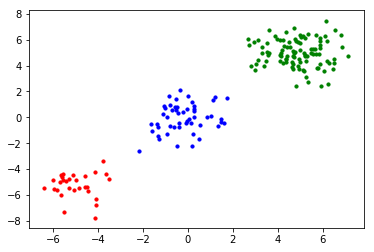

In [103]:
#5.空间和聚类分析
#(1)矢量量化
c1 = np.random.randn(100, 2) + 5  
c2 = np.random.randn(30, 2) - 5  
c3 = np.random.randn(50, 2) 
#将所有数据放入一个 180 x 2 的数组 
data = np.vstack([c1, c2, c3]) 
# 利用 k 均值方法计算聚类的质心和方差(centroids是质心，variance是方差)
centroids, variance = vq.kmeans(data, 3) 
# 变量identified中存放关于数据聚类的信息 
identified, distance = vq.vq(data, centroids) 
# 获得各类别的数据 
vqc1 = data[identified == 0] 
vqc2 = data[identified == 1] 
vqc3 = data[identified == 2]  
# print(vqc1)
# print(vqc1[:,0])
plt.figure()
plt.scatter(vqc1[:,0],vqc1[:,1],10,"red")
plt.scatter(vqc2[:,0],vqc2[:,1],10,"green")
plt.scatter(vqc3[:,0],vqc3[:,1],10,"blue")
plt.show()

d:\program files\python36\lib\site-packages\ipykernel_launcher.py:31: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
d:\program files\python36\lib\site-packages\ipykernel_launcher.py:38: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


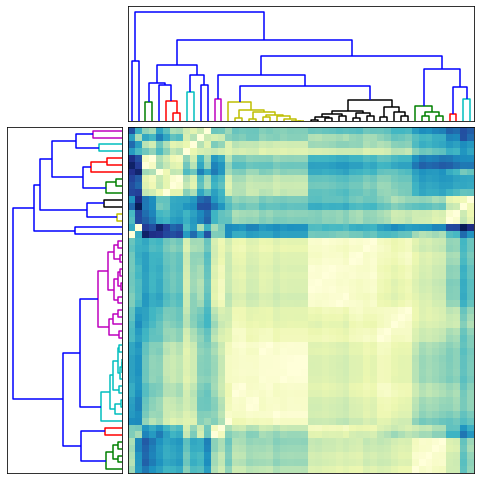

In [127]:
#(2)层次聚类 
def clusters(number=20,cnumber=5,csize=10):
    #聚类服从高斯分布
    rnum = np.random.rand(cnumber, 2)
    rn = rnum[:,0]*number
    rn = rn.astype(int)  
    rn[np.where(rn<5)] = 5
    rn[np.where(rn > number / 2.)] = round(number/2., 0)
    ra = rnum[:,1]*2.9
    ra[np.where(ra<1.5)]=1.5
    cls = np.random.randn(number,3)*csize
    #簇中心点的随机乘子
    rxyz = np.random.randn(cnumber - 1, 3)     
    for i in range(cnumber - 1):         
        tmp = np.random.randn(rn[i + 1], 3)         
        x = tmp[:, 0] + (rxyz[i, 0] * csize)         
        y = tmp[:, 1] + (rxyz[i, 1] * csize)         
        z = tmp[:, 2] + (rxyz[i, 2] * csize)        
        tmp = np.column_stack([x, y, z])        
        cls = np.vstack([cls, tmp])     
    return cls 

#创建待聚类数据及距离矩阵
cls = clusters()
D = pdist(cls[:, 0:2])
D = squareform(D)
#print(D)
#绘制左侧树状图
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y1 = hy.linkage(D,method='complete')
cutoff = 0.3*np.max(Y1[:,2])
Z1 = hy.dendrogram(Y1, orientation='left',color_threshold=cutoff)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
#绘制顶部树状图
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y2 = hy.linkage(D,method='average')
cutoff = 0.3*np.max(Y2[:,2])
Z2 = hy.dendrogram(Y2, color_threshold=cutoff)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
#显示距离矩阵
ax3 = fig.add_axes([0.3, 0.1, 0.6, 0.6]) 
idx1 = Z1['leaves'] 
idx2 = Z2['leaves'] 
D = D[idx1, :] 
D = D[:, idx2] 
ax3.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu) 
ax3.xaxis.set_visible(False) 
ax3.yaxis.set_visible(False)  
#将图片保存到pdf中
fig.savefig('cluster_hy_f01.pdf', bbox = 'tight') 
plt.show() 

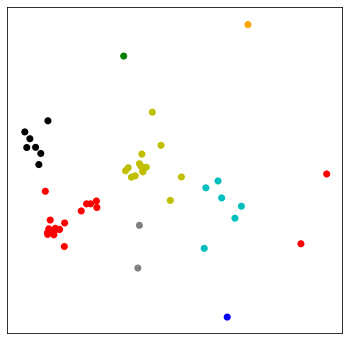

In [130]:
#fcluster
def group(data,index):
    #number表示类别数目
    number = np.unique(index)
    groups = []
    for i in number:
        groups.append(data[index==i])
    return groups
#创建数据
cls = clusters()
#计算linkage矩阵
Y = hy.linkage(cls[:,0:2], method='complete') 
# 从层次数据结构中, 用 fcluster 函数将层次结构的数据转为flat clusters 
cutoff = 0.3 * np.max(Y[:, 2]) 
index = hy.fcluster(Y, cutoff, 'distance') 
# 使用 grooup 函数将数据划分类别 
groups = group(cls, index) 
# 绘制数据点 
fig = plt.figure(figsize=(6, 6)) 
ax = fig.add_subplot(111) 
colors = ['r', 'c', 'b', 'g', 'orange', 'k', 'y', 'gray'] 
#enumerate是将列表的下标也列举出来
#i为列表的下标
for i, g in enumerate(groups): 
    i = np.mod(i, len(colors))
    ax.scatter(g[:,0], g[:,1], c=colors[i], edgecolor='none', s=50) 
ax.xaxis.set_visible(False)     
ax.yaxis.set_visible(False) 
fig.savefig('cluster_hy_f02.pdf', bbox = 'tight') 
plt.show()

In [29]:
#稀疏矩阵
N = 300
#创建随机稀疏矩阵
m = scipy.sparse.rand(N, N)
#创建包含相同数据的数组
a = m.toarray()
print("The numpy array data size: ",a.nbytes)
print("The sparse matrix data size: ",m.data.nbytes)
#数组求特征值
t0 = time.time()
res1 = eigh(a)
dt = str(np.round(time.time() - t0, 3)) + ' seconds'
print("无稀疏矩阵操作耗时 " + dt)
#稀疏长阵求特征值
t1 = time.time()
res2 = eigsh(m)
dt = str(np.round(time.time() - t1, 3)) + ' seconds'
print("稀疏长阵操作耗时 " + dt)

The numpy array data size:  720000
The sparse matrix data size:  7200
无稀疏矩阵操作耗时 0.033 seconds
稀疏长阵操作耗时 0.011 seconds
